# Groundwater Flow Modeling at University at Buffalo
Lab 2: Darcy Column Experiment and the One Dimension Finite Difference Code


## Objective:
    
Develop a 1D finite difference code to solve a Darcy column experiment.


## Problem:

In lab today we are going to write our own 1D finite difference code to solve for head in a Darcy column.  Our approach is going to use two different types of software to solve this problem.  In part one we are going to use the iteration function within Excel.  In the second part of the lab you are going to get the chance to write your own code from scratch using Python.

A vertical Darcy column contains a well sorted gravel.  Water is flowing into the top of the column and out of the bottom, just like Darcy’s original experiment.  Manometers at the top and the bottom of the column read a hydraulic head of 3.00 m and 1.00 meters, respectively.  It is your job to determine the hydraulic head at each of the given locations shown in the chart below using both an Excel and MATLAB based finite difference solution.


![alt text](Darcy Column.png "Title")

For both part one and two of this lab you will need to produce a plot showing the decrease in head with depth in the column along with a table similar to the one above showing the head in each of the cells.

## Part 1:

Excel has a quite useful iteration capability that is under utilized by most people.  In fact, some of the newer versions of Excel they have tried to get rid of these functions because of low use.  Thankfully the iteration capabilities are back and we can use them in lab.  In this first part of the lab it is my attempt to supply as much detail as possible to make your first interaction with the finite difference approach as pleasant as possible.  It is going to be a little bit of a cookie cutter approach but please hang in there.  In the second part of the lab you are going to be on your own, so hopefully that will make up for the point and click methods in part one.  



### Instructions for using Excel

1.	 Set up your cells in Excel so that you have you have 12 cells and then apply your boundary conditions to the top of the column and the bottom of the column.  To start with we will apply a head of 3.00 m to both the top and bottom of the column.  This in effect is going to give us a simple initial condition when we get down to step 3.  In step 4 we will change the bottom boundary to match our problem domain.

2.	You are now going to need to turn on the iteration capabilities.

a.  Click the File Tab (should be in the top left corner), click Options (left hand column near bottom), and then click the Formulas category.

b.  In the Calculation options section, select the Enable iterative calculation check box.

c.  To set the maximum number of times that Office Excel will recalculate, type the number of iterations in the Maximum Iterations box. The higher the number of iterations, the more time that Excel needs to calculate a worksheet.  In this lab we are going to use a maximum iteration of 100.

d.  To set the maximum amount of change you will accept between calculation results, type the amount in the Maximum Change box. The smaller the number, the more accurate the result and the more time that Excel needs to calculate a worksheet.  In this lab we are going to use a maximum change of 0.001 m.

3.	Enter the formula you are going to use to solve the Darcy column experiment problem into cells 2-11.  This formula is the same one we derived in class that dealt with a Homogenous, isotropic and steady state PDE (Think Laplace).

4.	Change the bottom cell to 1 m. 

5.	In step 4 you likely saw the values in the active cells change once you switched the bottom boundary condition.  This is not the final solution.  So we need to run the iteration a couple of more times by pressing the F9 key.  Please keep holding this button down until you see the model results stop changing.

6.	Graph your final head profile along with the table of head values in each of the cells.  It is kind of fun to graph these values in real time as you are running the iteration.  This allows you to see your model swing into line under as it approaches steady-state conditions (It happens really fast and is hard to see if you can’t zoom in).


## Part II:
As you can imagine Excel is a good tool to use for very simple (i.e. 1D and Steady State) groundwater flow problems.  However the world is not always 1D and Steady State, if it were I would not have a job.  So we need to find other ways to solve the finite difference problem that will allow us to upscale to more complex problems in the future.  To do this we are going learn how to write Python code that will solve this Darcy column problem for us.  The important thing to remember when writing your Python code is that everyone in the class is going to take a slightly different path on the way to the solution.  This means there is not one correct code to solve the problem but there is a correct answer (i.e. Head).

Below is a short outline of how you might go about writing the code but remember “many paths; one solution” so feel free to chose your own path.


### Possible Code Structure:
1.	 Create vector representing model cells and apply an initial condition for head
2.	Apply boundary conditions
3.	Make loop to iterate your finite difference equation
4.	Create some sort of stopping mechanism for iteration (i.e. Max Change in cells)
5.	Plot Results


In [2]:
import numpy as np

#Creates the base model domain
darcy_column = np.array([0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0])

In [3]:
#Defines boundary conditions
darcy_column[0]=3
darcy_column[11]=1

#Show you what darcy_column looks like
darcy_column

array([3., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

In [5]:
stop = True
darcy_last = darcy_column.copy()

#Loop for iterating the finite difference eqs

while stop:
    for cell in range(1,11):
      
        darcy_column[cell] = (darcy_column[cell - 1] + darcy_column[cell + 1])/2

#Stopping mechanism for iteration 

    #Finding the Change in head
    delta_head = abs(darcy_column-darcy_last)

    #This is the convergence criteria for the model
    cc = 0.01

    #Evaluating if the convergence criteria has been met
    test_cc = all(delta_head <= [cc,cc,cc,cc,cc,cc,cc,cc,cc,cc,cc,cc])
    
    if test_cc:
        stop = False
    else:
        darcy_last = darcy_column.copy()

#Printing out results

print("Here is the head in the Darcy Column:\n")
print(darcy_column)

Here is the head in the Darcy Column:

[3.         2.78023602 2.56649542 2.36083393 2.16450293 1.97791391
 1.80067241 1.63167331 1.46924489 1.31132656 1.15566328 1.        ]


Text(0,0.5,'Height of Darcy Column (m)')

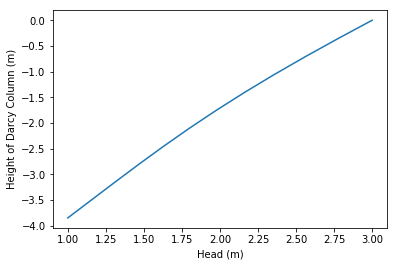

In [7]:
#Importing in our plotting code
import matplotlib.pyplot as plt

#Defining the y-axis lables
length_column = [0,-.35,-.7,-1.05,-1.4,-1.75,-2.1,-2.45,-2.8,-3.15,-3.5,-3.85]

plt.plot(darcy_column, length_column)
plt.xlabel('Head (m)')
plt.ylabel('Height of Darcy Column (m)')